In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Import data
co2_df = pd.read_csv('global_co2.csv')
temp_df = pd.read_csv('annual_temp.csv')

In [7]:
temp_df.head()

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687


In [8]:
co2_df.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [9]:
# Clean data
co2_df = co2_df.ix[:,:2]                     # Keep only total CO2
co2_df = co2_df.ix[co2_df['Year'] >= 1960]   # Keep only 1960 - 2010
co2_df.columns=['Year','CO2']                # Rename columns
co2_df = co2_df.reset_index(drop=True)                # Reset index

temp_df = temp_df[temp_df.Source != 'GISTEMP']                              # Keep only one source
temp_df.drop('Source', inplace=True, axis=1)                                # Drop name of source
temp_df = temp_df.reindex(index=temp_df.index[::-1])                        # Reset index
temp_df = temp_df.ix[temp_df['Year'] >= 1960].ix[temp_df['Year'] <= 2010]   # Keep only 1960 - 2010
temp_df.columns=['Year','Temperature']                                      # Rename columns
temp_df = temp_df.reset_index(drop=True)                                             # Reset index

In [10]:
# Concatenate
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis=1)

print(climate_change_df.head())

   Year   CO2  Temperature
0  1960  2569       0.0252
1  1961  2580       0.0818
2  1962  2686       0.0924
3  1963  2833       0.1100
4  1964  2995      -0.1461


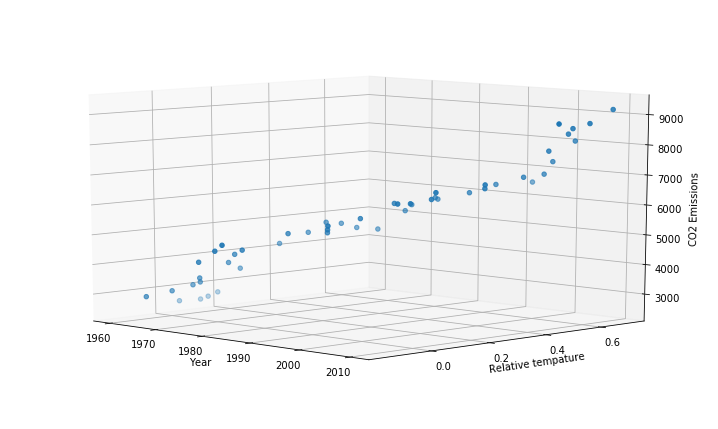

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

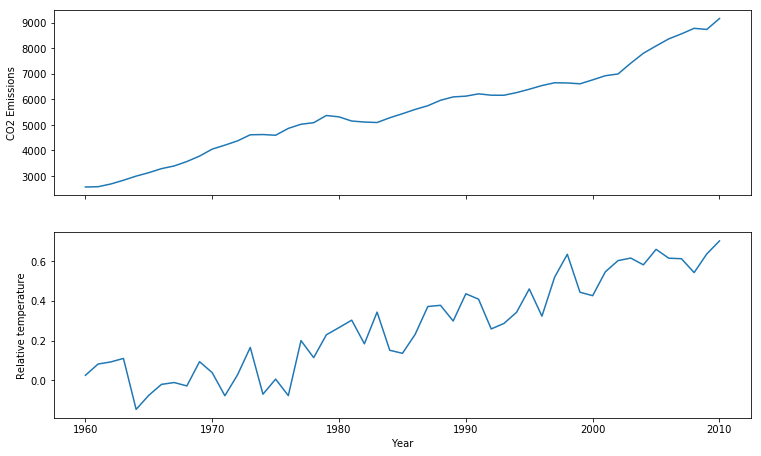

In [12]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')

In [15]:
from sklearn.model_selection import train_test_split

X = climate_change_df.as_matrix(['Year'])
Y = climate_change_df.as_matrix(['CO2', 'Temperature']).astype('float32')

X_train, X_test, y_train, y_test = np.asarray(train_test_split(X, Y, test_size=0.1))

In [16]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))

Score:  0.888210817923


In [17]:
x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T

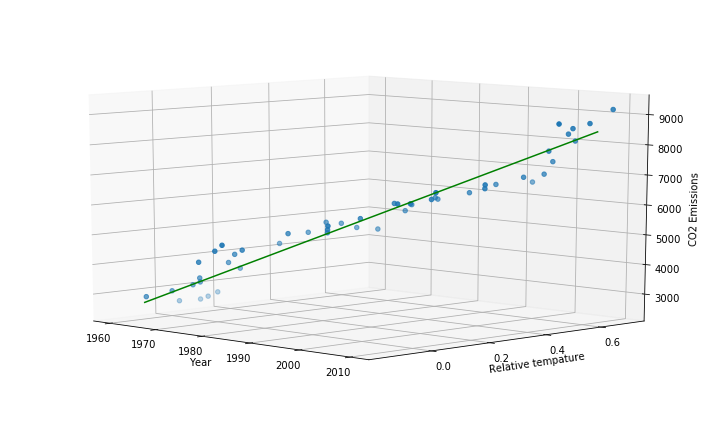

In [18]:
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.plot(xs=x_line, ys=p[1], zs=p[0], color='green')
ax.view_init(10, -45)

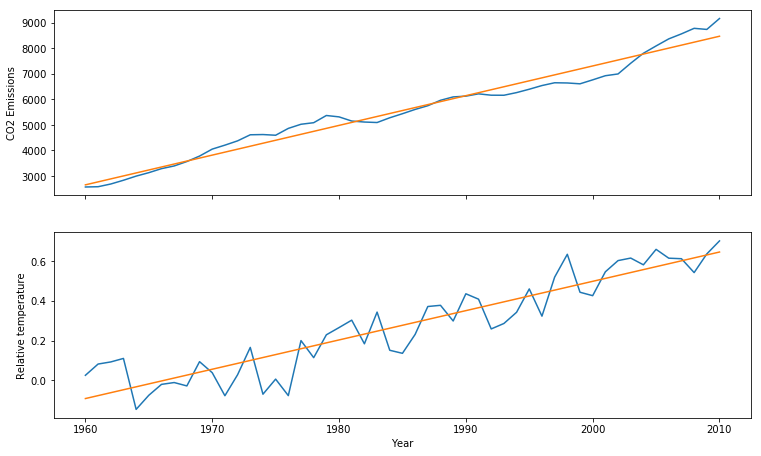

In [19]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(x_line, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(x_line, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')